In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем датафрейм, удаляем ненужный столбец.

In [2]:
df = pd.read_csv('Netology_A_B-testing.csv')

In [3]:
df.head()

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium


In [4]:
df = df.drop(df.columns[[0]], axis=1)

In [45]:
df.head(20)

,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium
5,2020-05-21,139455,5,1,0,0,NaN,0,0,60,Android,1,comfort,NaN,low
6,2020-05-24,416988,0,1,1,0,no surge,0,0,65,iOS,1,comfort,7.535725,low
7,2020-05-22,682337,2,1,1,1,no surge,1,0,40,Android,1,comfort,9.055344,medium
8,2020-05-23,931492,20,1,0,0,NaN,0,0,25,iOS,0,economy,NaN,medium
9,2020-05-23,662775,17,1,1,1,surge,1,0,48,Android,1,comfort,4.828326,medium


### Метрика 1

Посчитаем метрику, которая отражает, сколько поездок совершид каждый пассажир за выбранный период времени (по которому у нас имеются данные). Для этого сгруппируем данные по user_id и используем count. Считаем только те строки, где поездка завершена успешно.

In [90]:
rides = df.loc[df.ride_completed == 1].groupby('user_id').agg(['count'])['ride_completed']

In [91]:
rides.head()

,count
user_id,
100093,3
100118,4
100134,3
100166,3
100255,4


Считаем среднюю.

In [92]:
rides.mean()

count    2.770825
dtype: float64

Считаем медиану.

In [93]:
rides.median()

count    3.0
dtype: float64

Считаем 95-персентиль.

In [94]:
np.percentile(rides, 95)

5.0

Строим частотный график.

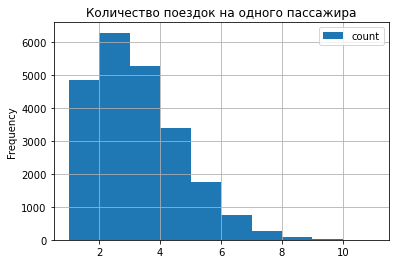

In [95]:
rides.plot(kind='hist',
                   title='Количество поездок на одного пассажира', grid=True)
plt.show()

Видим положительную асимметрию с длинным хвостом справа.

Строим boxplot.

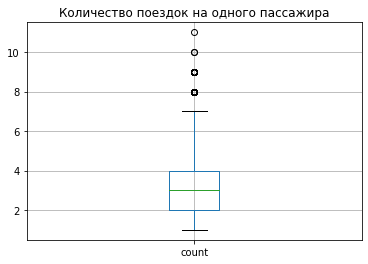

In [96]:
rides.plot(kind='box',
                   title='Количество поездок на одного пассажира', grid=True)
plt.show()

Видим, что в данных есть несколько выбросов - пассажиров, которые заказывали такси существенно чаще других.

### Метрика 2

Посчитаем метрику, которая отражает минимальное расстояние, на которое передвигался каждый пассажир за выбранный период времени (по которому у нас имеются данные). Здесь тоже отфильтруем сначала те поездки, которые были завершены.

In [98]:
min_distance = df.loc[df.ride_completed == 1].groupby('user_id').agg(['min'])['distance']

In [99]:
min_distance.head()

,min
user_id,
100093,1.537912
100118,0.658778
100134,5.780456
100166,1.263404
100255,2.999283


Считаем среднюю и медиану.

In [100]:
np.mean(min_distance)

min    3.171585
dtype: float64

In [101]:
np.median(min_distance)

2.4021928517197897

Считаем 95-персентиль.

In [102]:
np.percentile(min_distance, 95)

8.553177263945692

Строим частотный график.

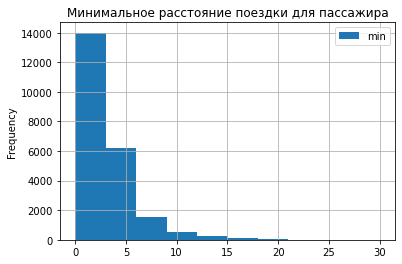

In [103]:
min_distance.plot(kind='hist',
                   title='Минимальное расстояние поездки для пассажира', grid=True)
plt.show()

Видим положительную асимметрию с длинным хвостом справа.

Строим boxplot.

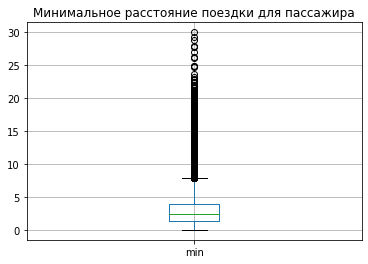

In [104]:
min_distance.plot(kind='box',
                   title='Минимальное расстояние поездки для пассажира', grid=True)
plt.show()

На графике видно большое количество выбросов, где минимальное расстояние поездки довольно большое. Возможно, это пассажиры, которые регулярно ездят по одному маршруту на большие расстояния (например, живут далеко от работы и добираются на такси), или, возможно, пассажиры, которые за рассматриваемый период заказывали такси всего несколько раз, но на большие расстояния (например, в аэропорт).

### Метрика 3

Посчитаем метрику, которая отражает максимальное расстояние, на которое передвигался каждый пассажир за выбранный период времени (по которому у нас имеются данные).

In [105]:
max_distance = df.loc[df.ride_completed == 1].groupby('user_id').agg(['max'])['distance']

In [106]:
max_distance.head()

,max
user_id,
100093,7.965125
100118,10.942383
100134,13.714453
100166,4.946169
100255,9.279891


Считаем среднюю и медиану.

In [107]:
np.mean(max_distance)

max    8.253773
dtype: float64

In [108]:
np.median(max_distance)

7.328639073525325

Считаем 95-персентиль.

In [109]:
np.percentile(max_distance, 95)

17.613888781945064

Строим частотный график.

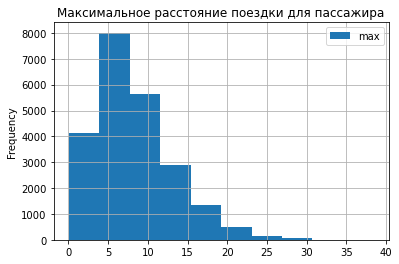

In [110]:
max_distance.plot(kind='hist',
                   title='Максимальное расстояние поездки для пассажира', grid=True)
plt.show()

Видим положительную асимметрию с длинным хвостом справа.

Строим boxplot.

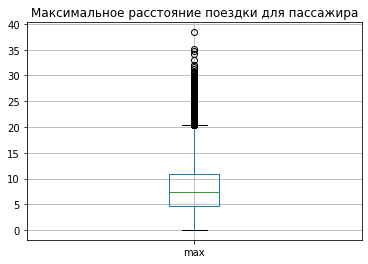

In [112]:
max_distance.plot(kind='box',
                   title='Максимальное расстояние поездки для пассажира', grid=True)
plt.show()

На графике также видно большое количество выбросов, где максимальное расстояние поездки довольно большое. Возможно, это такие же пассажиры, что и в предыдущем случае: которые регулярно ездят по одному маршруту на большие расстояния или заказывали такси всего несколько раз, но также на большие расстояния.